In [190]:
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from IPython.display import Image

# import pyspark


pio.templates.default = "plotly_dark"

In [191]:
df = pd.read_csv('datasets/diabetes.csv')
df.shape

(768, 9)

In [192]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [193]:
df.isna().any(), df.isnull().any()

(Pregnancies                 False
 Glucose                     False
 BloodPressure               False
 SkinThickness               False
 Insulin                     False
 BMI                         False
 DiabetesPedigreeFunction    False
 Age                         False
 Outcome                     False
 dtype: bool,
 Pregnancies                 False
 Glucose                     False
 BloodPressure               False
 SkinThickness               False
 Insulin                     False
 BMI                         False
 DiabetesPedigreeFunction    False
 Age                         False
 Outcome                     False
 dtype: bool)

In [194]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [195]:
df.iloc[:,1:-1] = df.iloc[:,1:-1].replace(0, np.NaN)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [196]:
df['BMI'].isna().value_counts(), df['Insulin'].isna().value_counts()

(False    757
 True      11
 Name: BMI, dtype: int64,
 False    394
 True     374
 Name: Insulin, dtype: int64)

Pregnancies                   1.000
Glucose                      99.000
BloodPressure                70.000
SkinThickness                32.000
Insulin                     105.000
BMI                          32.000
DiabetesPedigreeFunction      0.254
Age                          22.000
Outcome                       0.000
Name: 0, dtype: float64


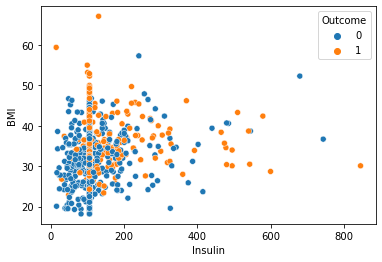

In [197]:
import random
modes = df.mode().iloc[0]
# modes = df.mean()
std = df.std()

df = df.replace(np.NaN, modes)
print(modes)

# df.head()
sns.scatterplot(data=df, x='Insulin', y='BMI', hue='Outcome')
plt.show()

In [198]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,105.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,105.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,105.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,105.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,105.0,30.1,0.349,47,1


In [199]:
df.describe()
# df.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.539062,72.295573,29.994792,130.932292,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.490660,12.106756,8.886506,88.700443,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,105.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.000000,105.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


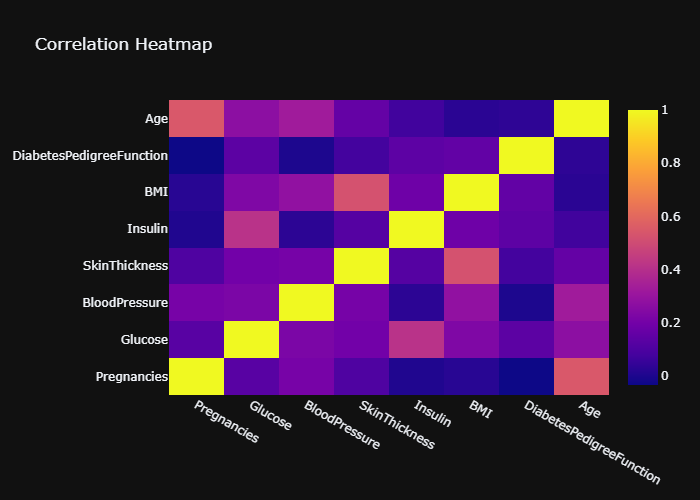

In [200]:
df_corr = df.iloc[:,:-1].corr()
heatmap_trace = go.Heatmap(z=df_corr.values, x=df_corr.columns, y=df_corr.columns, zhoverformat=".2f")
fig = go.Figure(data=[heatmap_trace])
fig.update_layout(
    title='Correlation Heatmap',
)
# saving the plotly fig as a png
tmp_file = 'plotly_images/correlation_heatmap.png'
pio.write_image(fig, tmp_file,format='png')

Image(tmp_file)
# fig.show()

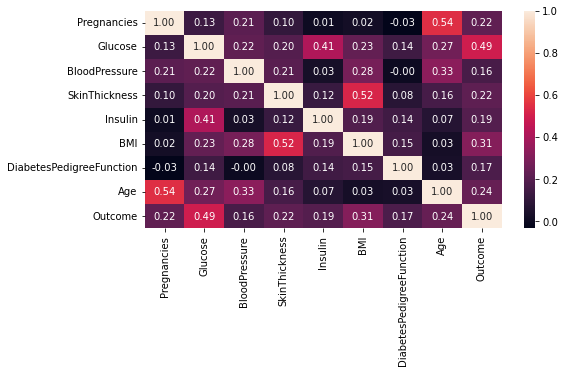

In [201]:
fig = plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), fmt='.2f', annot=True);

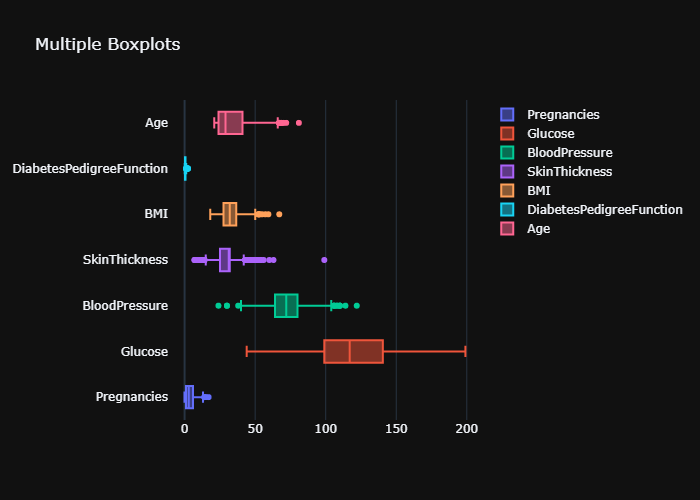

In [202]:
box_plots = []

for col in df.columns:
    if col not in ['Outcome', 'Insulin']:
        box_plots.append(go.Box(x=df[col], name=col))

fig = make_subplots(rows=1, cols=1)

for boxplot in box_plots:
    fig.add_trace(boxplot)

fig.update_layout(title='Multiple Boxplots')

tmp_file = 'plotly_images/multiple_boxplots.png'
pio.write_image(fig, tmp_file)
Image(tmp_file)

# fig.show()

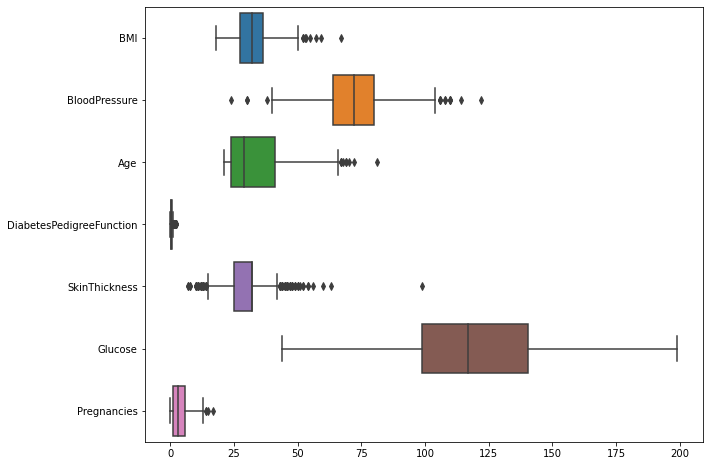

In [203]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['BMI', 'BloodPressure', 'Age', 'DiabetesPedigreeFunction', 'SkinThickness', 'Glucose', 'Pregnancies']], orient='h')
plt.show()

In [204]:
px.box(data_frame=df, x='Insulin',)

In [205]:
import scipy.stats as st

z_scores = np.abs(st.zscore(df))
threshold = 3
is_outlier = (z_scores > threshold).any(axis=1)

df_cleaned = df[~is_outlier].copy()
df_cleaned.shape
# df_cleaned.head()

(718, 9)

In [206]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

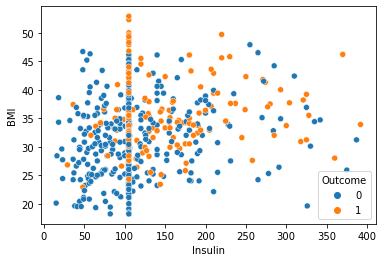

In [207]:
sns.scatterplot(data=df_cleaned, x='Insulin', y='BMI', hue='Outcome')
plt.show()

In [208]:
# balance the Outcome values
df_temp = df[df['Outcome']==0].sample(232)
df_balanced = df[~df['Outcome'].index.isin(df_temp.index)]
df_balanced

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,105.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,105.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,105.0,23.3,0.672,32,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
759,6,190.0,92.0,32.0,105.0,35.5,0.278,66,1
761,9,170.0,74.0,31.0,105.0,44.0,0.403,43,1
762,9,89.0,62.0,32.0,105.0,22.5,0.142,33,0
764,2,122.0,70.0,27.0,105.0,36.8,0.340,27,0


In [209]:
# check
df_balanced['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

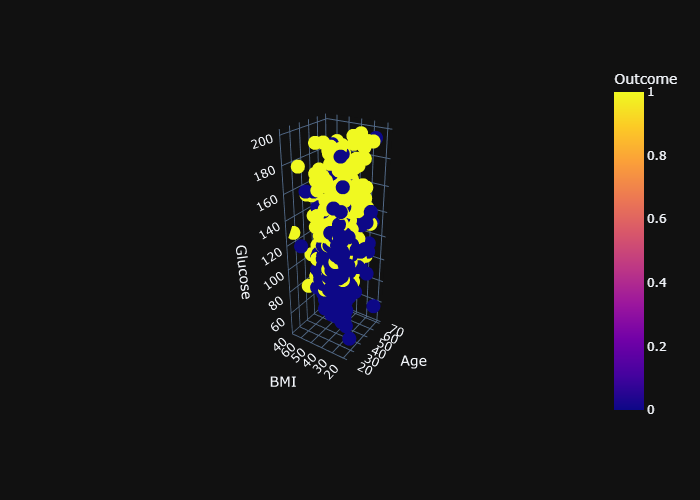

In [210]:
fig = px.scatter_3d(data_frame=df_balanced, x='Age', y='BMI', z='Glucose', color='Outcome')   # width=800, height=1200
tmp_file = 'plotly_images/3d_scatter_1.png'

camera = dict(
    eye=dict(x=-3, y=-2, z=2),
)
fig.update_layout(scene_camera=camera)
pio.write_image(fig, tmp_file)

Image(tmp_file)
# fig.show()

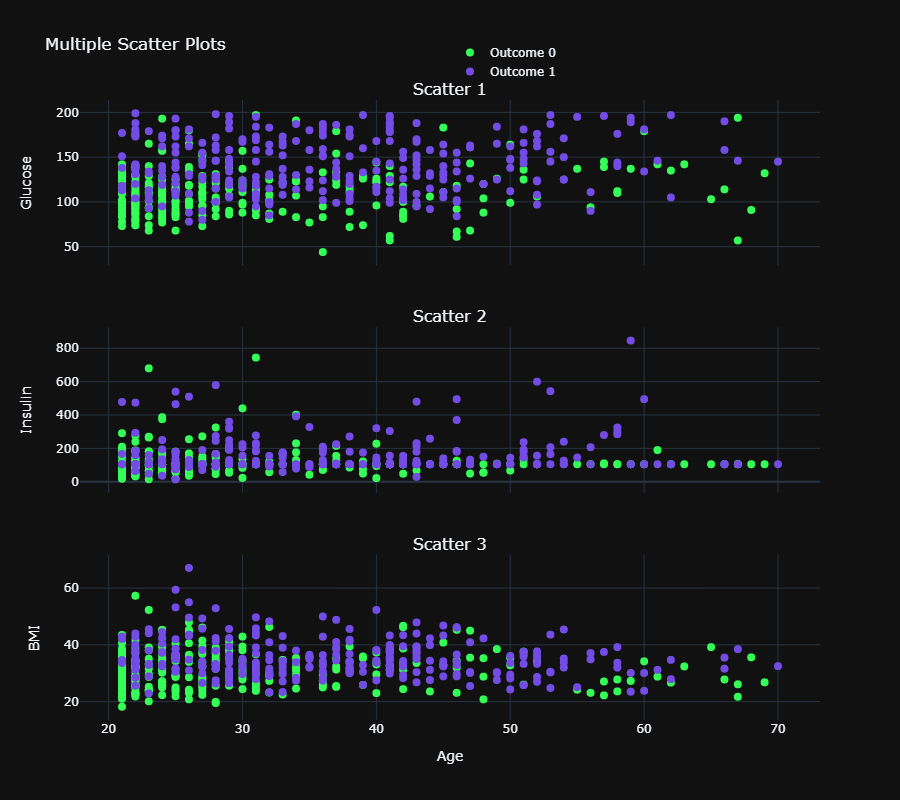

In [211]:
# opt 1. DF_Balanced
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from IPython.display import Image

color_scale = ['#33FF57', '#724ce4']    # '#f06454']
# Traces
sc00 = go.Scatter(x=df_balanced[df_balanced['Outcome'] == 0]['Age'], y=df_balanced[df_balanced['Outcome'] == 0]['Glucose'], mode='markers', name='Outcome 0', showlegend=True, marker=dict(color=color_scale[0], size=8), legendgroup='Outcome')
sc01 = go.Scatter(x=df_balanced[df_balanced['Outcome'] == 1]['Age'], y=df_balanced[df_balanced['Outcome'] == 1]['Glucose'], mode='markers', name='Outcome 1', showlegend=True, marker=dict(color=color_scale[1], size=8), legendgroup='Outcome')

sc10 = go.Scatter(x=df_balanced[df_balanced['Outcome'] == 0]['Age'], y=df_balanced[df_balanced['Outcome'] == 0]['Insulin'], mode='markers', name='Outcome 0', showlegend=False, marker=dict(color=color_scale[0], size=8), legendgroup='Outcome')
sc11 = go.Scatter(x=df_balanced[df_balanced['Outcome'] == 1]['Age'], y=df_balanced[df_balanced['Outcome'] == 1]['Insulin'], mode='markers', name='Outcome 1', showlegend=False, marker=dict(color=color_scale[1], size=8), legendgroup='Outcome')

sc20 = go.Scatter(x=df_balanced[df_balanced['Outcome'] == 0]['Age'], y=df_balanced[df_balanced['Outcome'] == 0]['BMI'], mode='markers', name='Outcome 0', showlegend=False, marker=dict(color=color_scale[0], size=8), legendgroup='Outcome')
sc21 = go.Scatter(x=df_balanced[df_balanced['Outcome'] == 1]['Age'], y=df_balanced[df_balanced['Outcome'] == 1]['BMI'], mode='markers', name='Outcome 1', showlegend=False, marker=dict(color=color_scale[1], size=8), legendgroup='Outcome')

# Create subplots
fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=('Scatter 1', 'Scatter 2', 'Scatter 3'),
                    vertical_spacing=0.1,
                    row_heights=[0.3, 0.3, 0.3],
                    )

# Add traces to subplots
fig.add_trace(sc00, row=1, col=1)
fig.add_trace(sc01, row=1, col=1)

fig.add_trace(sc10, row=2, col=1)
fig.add_trace(sc11, row=2, col=1)

fig.add_trace(sc20, row=3, col=1)
fig.add_trace(sc21, row=3, col=1)

# Update layout and axes
fig.update_layout(
    title='Multiple Scatter Plots',
    legend=dict(orientation="h", x=0.5, y=1.1),
    height=800,
    width=900,
)
fig.update_xaxes(title_text='Age', row=3, col=1)
fig.update_yaxes(title_text='Glucose', row=1, col=1)
fig.update_yaxes(title_text='Insulin', row=2, col=1)
fig.update_yaxes(title_text='BMI', row=3, col=1)

# Save or '#'display the plot
tmp_file = 'plotly_images/3d_scatter_2ex.png'
pio.write_image(fig, tmp_file)
Image(tmp_file)
# fig.show()

In [212]:
# # opt 2
# color_scale = ['#FF5733', '#33FF57']
# unique_outcomes = df['Outcome'].unique()
# scatter_traces = []
#
# for col in ['Glucose', 'Insulin', 'BMI']:
#     for outcome in unique_outcomes:
#         filtered_df = df[df['Outcome'] == outcome]
#         scatter_trace = go.Scatter(
#             x=filtered_df['Age'],
#             y=filtered_df[col],
#             mode='markers',
#             name=f'Outcome={outcome}',
#             marker=dict(color=outcome, colorscale=color_scale),
#             showlegend=True,
#         )
#         scatter_traces.append(scatter_trace)
#
# fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
#                     subplot_titles=('Scatter 1', 'Scatter 2', 'Scatter 3'),
#                     vertical_spacing=0.1,
#                     row_heights=[0.3, 0.3, 0.3])
#
# for trace in scatter_traces:
#     fig.add_trace(trace, row=scatter_traces.index(trace)//2 + 1, col=1)
#
# fig.update_layout(
#     template='plotly_dark',
#     title='Multiple Scatter Plots',
#     legend=dict(orientation="h", x=1, y=1.2, xanchor='right', yanchor='top'),
#     height=800,
#     width=900,
# )
#
# fig.update_xaxes(title_text='Age', row=3, col=1)
# fig.update_yaxes(title_text='Glucose', row=1, col=1)
# fig.update_yaxes(title_text='Insulin', row=2, col=1)
# fig.update_yaxes(title_text='BMI', row=3, col=1)
#
# tmp_file = 'plotly_images/3d_scatter_3.png'
# pio.write_image(fig, tmp_file)
# Image(tmp_file)
# # fig.show()

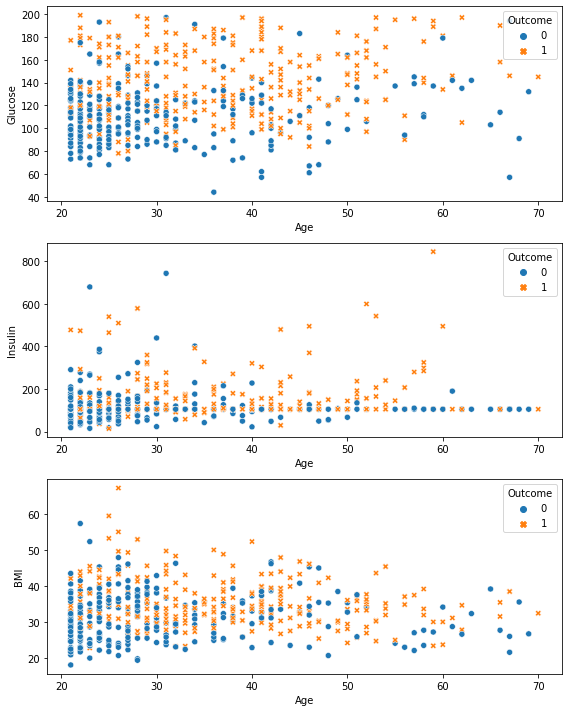

In [213]:
# seaborn
fig, ax = plt.subplots(3,1, figsize=(8, 10))
for i, col in enumerate(['Glucose', 'Insulin', 'BMI']):
    sns.scatterplot(data=df_balanced, x='Age', y=col, hue='Outcome', style='Outcome', ax=ax[i]);
fig.tight_layout()

# Feature Engineering

In [214]:
data2 = df_cleaned.copy()
# data2 = df_balanced.copy()

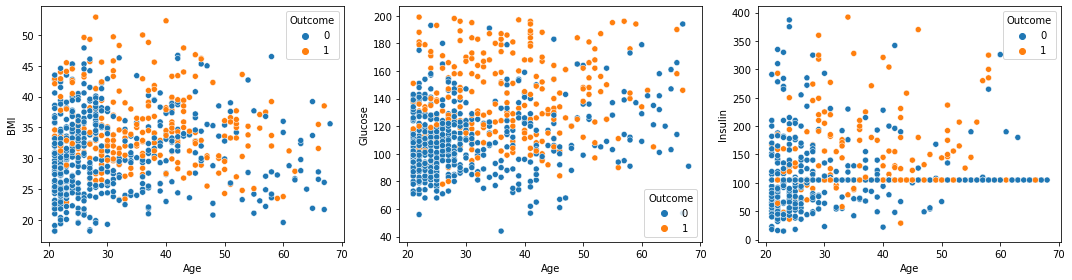

In [215]:
# Origin.
fig, ax = plt.subplots(1, 3, figsize=(15,4))
sns.scatterplot(data=data2, x='Age', y='BMI', hue='Outcome', ax=ax[0])
sns.scatterplot(data=data2, x='Age', y='Glucose', hue='Outcome', ax=ax[1])
sns.scatterplot(data=data2, x='Age', y='Insulin', hue='Outcome', ax=ax[2])
fig.tight_layout()
plt.show()

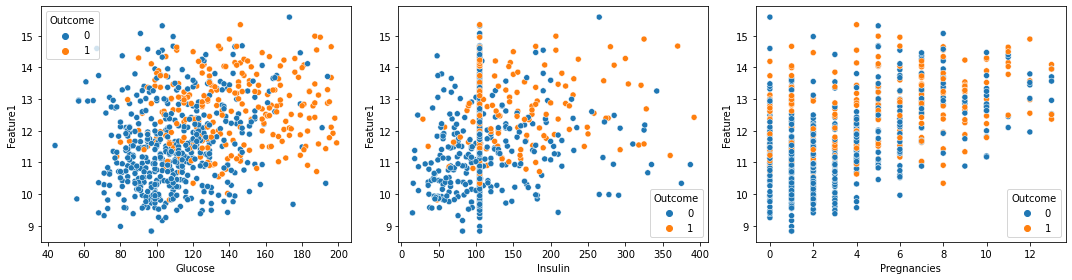

In [216]:
# opt1
data2['Feature1'] = np.log(data2['BMI']) * np.log(data2['Age'])

fig, ax = plt.subplots(1, 3, figsize=(15,4))
sns.scatterplot(data=data2, x='Glucose', y='Feature1', hue='Outcome', ax=ax[0])
sns.scatterplot(data=data2, x='Insulin', y='Feature1', hue='Outcome', ax=ax[1])
sns.scatterplot(data=data2, x='Pregnancies', y='Feature1', hue='Outcome', ax=ax[2])
fig.tight_layout()
plt.show()

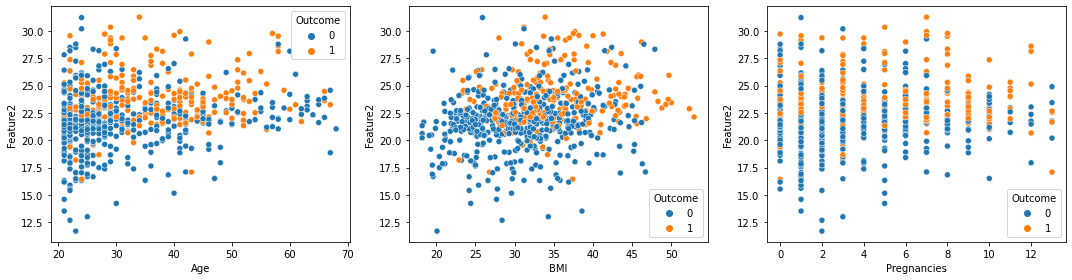

In [217]:
# EXP 1
# data2['Feature2'] = np.multiply(np.log10(data2['Insulin']), np.log10(data2['Glucose']))
data2['Feature2'] = np.log(data2['Insulin']+1) * np.log(data2['Glucose'])

fig, ax = plt.subplots(1, 3, figsize=(15,4))
sns.scatterplot(data=data2, x='Age', y='Feature2', hue='Outcome', ax=ax[0])
sns.scatterplot(data=data2, x='BMI', y='Feature2', hue='Outcome', ax=ax[1])
sns.scatterplot(data=data2, x='Pregnancies', y='Feature2', hue='Outcome', ax=ax[2])
fig.tight_layout()
plt.show()

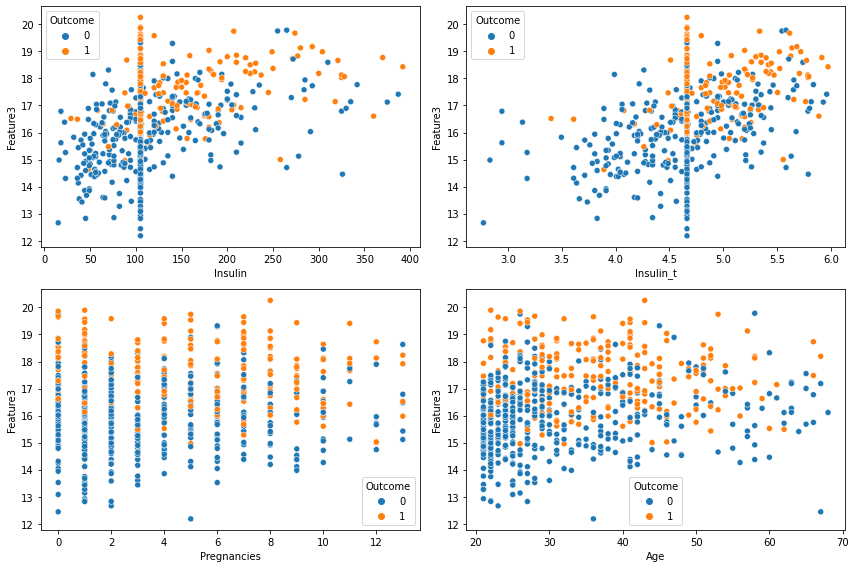

In [218]:
# exp del
data2['Feature3'] = np.log(data2['Glucose']) * np.log(data2['BMI'])
data2['Insulin_t'] = np.log(data2['Insulin']+1)
data2['BMI_t'] = np.log(data2['BMI'])
data2['Glucose_t'] = np.log(data2['Glucose'])
data2['SkinThickness_t'] = np.log(data2['SkinThickness']+1)

fig, ax = plt.subplots(2, 2, figsize=(12,8))
sns.scatterplot(data=data2, x='Insulin', y='Feature3', hue='Outcome', ax=ax[0,0])
sns.scatterplot(data=data2, x='Insulin_t', y='Feature3', hue='Outcome', ax=ax[0,1])
sns.scatterplot(data=data2, x='Pregnancies', y='Feature3', hue='Outcome', ax=ax[1,0])
sns.scatterplot(data=data2, x='Age', y='Feature3', hue='Outcome', ax=ax[1,1])
fig.tight_layout()
plt.show()

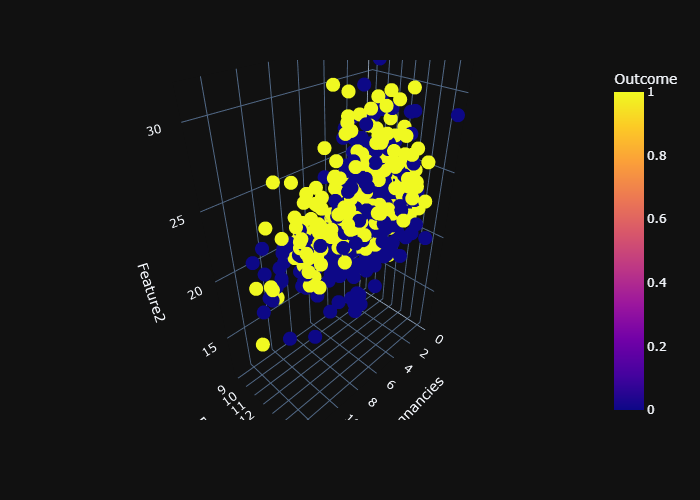

In [219]:
# sns.scatterplot(data=data2, x='BMI', y='F2', hue='Outcome');
# fig = px.scatter_3d(data_frame=data2, x='Glucose_t', y='BMI_t', z='Insulin_t', color=data2['Outcome'])
fig = px.scatter_3d(data_frame=data2, x='Pregnancies', y='Feature1', z='Feature2', color=data2['Outcome'])
tmp_file = 'plotly_images/3d_scatter_4.png'
pio.write_image(fig, tmp_file)
Image(tmp_file)
# fig.show()

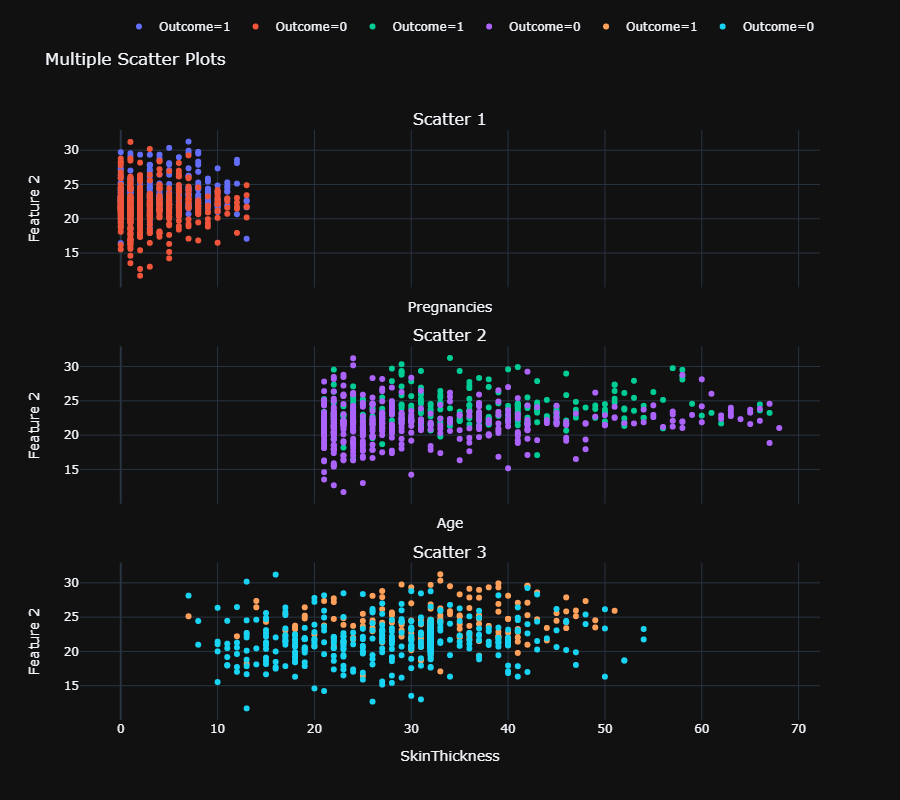

In [220]:
# DELE
new_scatter = []
unique_outcomes = data2['Outcome'].unique()
for col in ['Pregnancies', 'Age', 'SkinThickness']:
    for outcome in unique_outcomes:
        filtered_df = data2[data2['Outcome'] == outcome]
        scatter_trace = go.Scatter(
            x=filtered_df[col],
            y=filtered_df['Feature2'],
            mode='markers',
            name=f'Outcome={outcome}',
            marker=dict(color=outcome, colorscale=color_scale),
            showlegend=True,
        )
        new_scatter.append(scatter_trace)

fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=('Scatter 1', 'Scatter 2', 'Scatter 3'),
                    vertical_spacing=0.1,
                    row_heights=[0.3, 0.3, 0.3])

for trace in new_scatter:
    fig.add_trace(trace, row=new_scatter.index(trace)//2 + 1, col=1)

fig.update_layout(
    template='plotly_dark',
    title='Multiple Scatter Plots',
    legend=dict(orientation="h", x=1, y=1.2, xanchor='right', yanchor='top'),
    height=800,
    width=900,
)

fig.update_yaxes(title_text='Feature 2')
fig.update_xaxes(title_text='Pregnancies', row=1, col=1)
fig.update_xaxes(title_text='Age', row=2, col=1)
fig.update_xaxes(title_text='SkinThickness', row=3, col=1)

tmp_file = 'plotly_images/3d_scatter_4.png'
pio.write_image(fig, tmp_file)
Image(tmp_file)
# fig.show()

# ML

Confusion Matrix:
       Pred 1  Pred 0
Act 1     150       2
Act 0      54      10


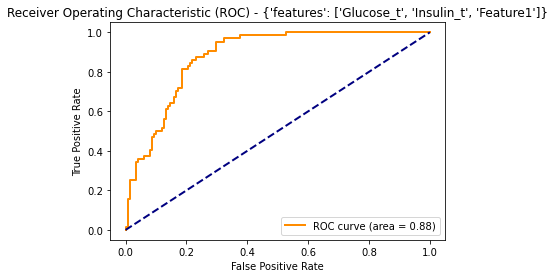

Confusion Matrix:
       Pred 1  Pred 0
Act 1     152       0
Act 0      62       2


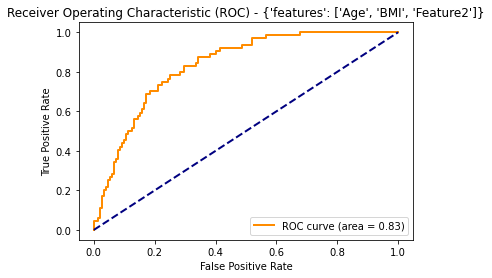

Confusion Matrix:
       Pred 1  Pred 0
Act 1     149       3
Act 0      57       7


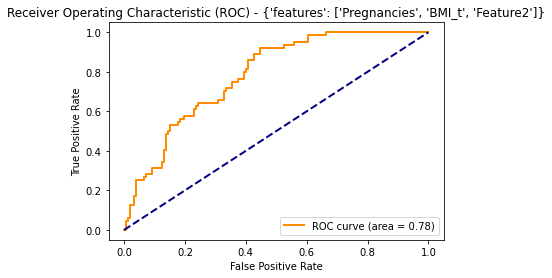

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix:
       Pred 1  Pred 0
Act 1     152       0
Act 0      64       0


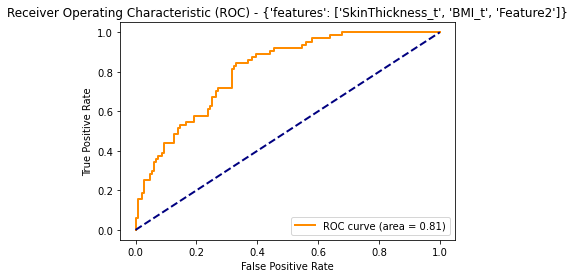

Confusion Matrix:
       Pred 1  Pred 0
Act 1     145       7
Act 0      52      12


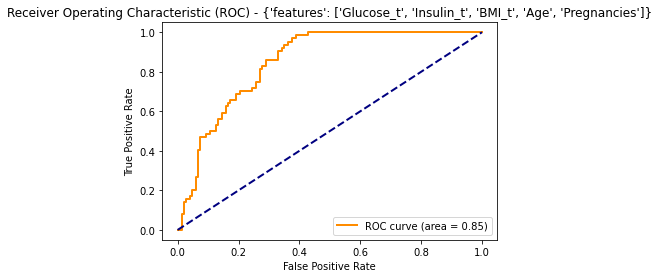

Confusion Matrix:
       Pred 1  Pred 0
Act 1     143       9
Act 0      46      18


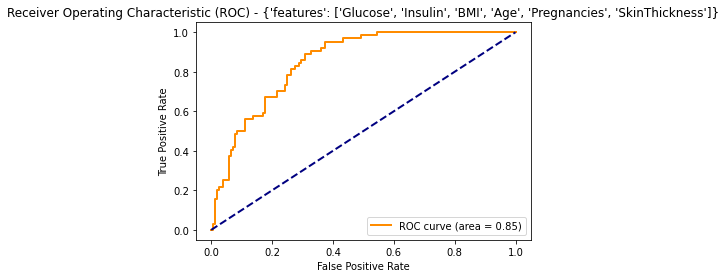

In [236]:
# FUNCTION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



results_df = pd.DataFrame(columns=['Configuration', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Different configurations to try
configurations = [
    {'features': ['Glucose_t', 'Insulin_t', 'Feature1']},   # Feature1 = np.log(data2['BMI']) * np.log(data2['Age'])

    {'features': ['Age', 'BMI', 'Feature2']},             # Feature2 = np.log(data2['Insulin']+1) * np.log(data2['Glucose'])
    {'features': ['Pregnancies', 'BMI_t', 'Feature2']},
    {'features': ['SkinThickness_t', 'BMI_t', 'Feature2']},

    {'features': ['Glucose_t', 'Insulin_t', 'BMI_t', 'Age', 'Pregnancies']},
    {'features': ['Glucose', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']},
]

for config in configurations:
    X = data2[config['features']]
    y = data2['Outcome']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train+0.001)
    X_test_scaled = scaler.transform(X_test+0.001)

    model = LogisticRegression()

    param_grid = {'C': [0.001, 0.01, 0.1], 'penalty': ['l2']}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    # print(f"Confusion Matrix: \n{confusion}")
    print(f"Confusion Matrix:")
    print(pd.DataFrame(data=confusion, index=['Act 1', 'Act 0'], columns=['Pred 1', 'Pred 0']))

    # Store results in DataFrame
    results_df = results_df.append({
        'Configuration': str(config['features']),
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1 Score': round(f1, 2)
    }, ignore_index=True)

    # ROC curve
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - ' + str(config))
    plt.legend(loc='lower right')
    plt.show()

In [233]:
results_df

,Configuration,Accuracy,Precision,Recall,F1 Score
0,"['Glucose_t', 'Insulin_t', 'Feature1']",0.74,0.83,0.16,0.26
1,"['Age', 'BMI', 'Feature2']",0.71,1.00,0.03,0.06
2,"['Pregnancies', 'BMI_t', 'Feature2']",0.72,0.70,0.11,0.19
3,"['SkinThickness_t', 'BMI_t', 'Feature2']",0.70,0.00,0.00,0.00
4,"['Glucose_t', 'Insulin_t', 'BMI_t', 'Age', 'Pr...",0.73,0.63,0.19,0.29
5,"['Glucose', 'Insulin', 'BMI', 'Age', 'Pregnanc...",0.75,0.67,0.28,0.40


# Kfold + RandomForest


Configuration: {'features': ['Glucose_t', 'Insulin_t', 'Feature1']}
Logistic Regression Metrics:
Cross-Validation F1 Scores: [0.67, 0.6, 0.5, 0.86, 0.25, 0.4, 0.67, 0.43, 0.44, 0.86, 0.62, 0.91, 0.46, 0.44, 0.29]
Highest F1 Score: 0.91
Mean F1 Score: 0.58
Score on Test Set: 0.77
Model params:  [-4.70647019] [[3.85083324 0.91237735 2.50439831]]

Random Forest Metrics:
Accuracy: 0.77
Precision: 0.62
Recall: 0.61
F1 Score: 0.61
Feature importances: [0.38973853 0.19043999 0.41982148]


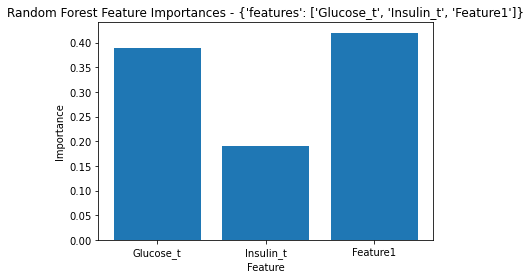


Configuration: {'features': ['Age', 'BMI', 'Feature2']}
Logistic Regression Metrics:
Cross-Validation F1 Scores: [0.46, 0.44, 0.36, 0.67, 0.29, 0.4, 0.4, 0.53, 0.6, 0.77, 0.36, 0.67, 0.57, 0.57, 0.29]
Highest F1 Score: 0.77
Mean F1 Score: 0.45
Score on Test Set: 0.78
Model params:  [-4.19759825] [[1.23215319 2.35038965 3.70454345]]

Random Forest Metrics:
Accuracy: 0.77
Precision: 0.61
Recall: 0.66
F1 Score: 0.63
Feature importances: [0.24950057 0.33345695 0.41704249]


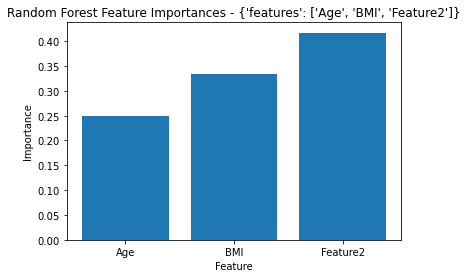


Configuration: {'features': ['Pregnancies', 'BMI_t', 'Feature2']}
Logistic Regression Metrics:
Cross-Validation F1 Scores: [0.43, 0.6, 0.5, 0.67, 0.0, 0.4, 0.67, 0.62, 0.73, 0.55, 0.55, 0.89, 0.57, 0.57, 0.0]
Highest F1 Score: 0.89
Mean F1 Score: 0.49
Score on Test Set: 0.77
Model params:  [-4.64551801] [[1.39581724 2.38180344 3.80713577]]

Random Forest Metrics:
Accuracy: 0.72
Precision: 0.52
Recall: 0.52
F1 Score: 0.52
Feature importances: [0.1485164  0.38776324 0.46372036]


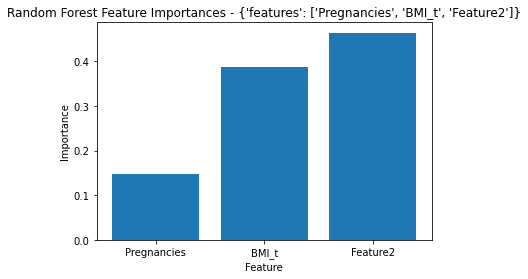


Configuration: {'features': ['SkinThickness_t', 'BMI_t', 'Feature2']}
Logistic Regression Metrics:
Cross-Validation F1 Scores: [0.5, 0.25, 0.2, 0.8, 0.0, 0.55, 0.67, 0.43, 0.6, 0.77, 0.4, 0.75, 0.33, 0.5, 0.67]
Highest F1 Score: 0.8
Mean F1 Score: 0.45
Score on Test Set: 0.77
Model params:  [-4.7425253] [[0.75862652 2.2322217  3.97780669]]

Random Forest Metrics:
Accuracy: 0.72
Precision: 0.53
Recall: 0.56
F1 Score: 0.55
Feature importances: [0.18386511 0.36823857 0.44789631]


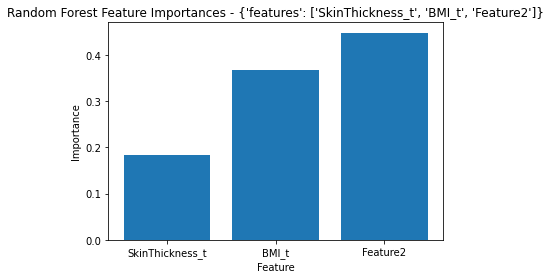


Configuration: {'features': ['Glucose_t', 'Insulin_t', 'BMI_t', 'Age', 'Pregnancies']}
Logistic Regression Metrics:
Cross-Validation F1 Scores: [0.63, 0.67, 0.36, 0.86, 0.29, 0.4, 0.67, 0.43, 0.6, 0.77, 0.62, 0.91, 0.46, 0.5, 0.33]
Highest F1 Score: 0.91
Mean F1 Score: 0.59
Score on Test Set: 0.8
Model params:  [-5.22526063] [[3.9041933  0.83252988 2.28862113 0.55453026 1.15602207]]

Random Forest Metrics:
Accuracy: 0.72
Precision: 0.53
Recall: 0.53
F1 Score: 0.53
Feature importances: [0.33542847 0.1380935  0.2272979  0.18684948 0.11233065]


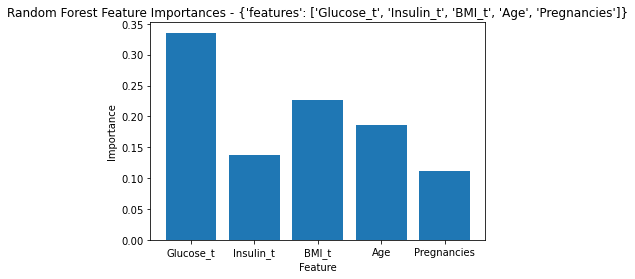


Configuration: {'features': ['Glucose', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']}
Logistic Regression Metrics:
Cross-Validation F1 Scores: [0.53, 0.67, 0.36, 0.86, 0.25, 0.4, 0.67, 0.43, 0.6, 0.77, 0.67, 0.91, 0.46, 0.44, 0.33]
Highest F1 Score: 0.91
Mean F1 Score: 0.59
Score on Test Set: 0.78
Model params:  [-4.10340226] [[3.77185099 0.4045496  1.87471362 0.52811429 1.15877567 0.66896155]]

Random Forest Metrics:
Accuracy: 0.78
Precision: 0.64
Recall: 0.59
F1 Score: 0.62
Feature importances: [0.31773528 0.12013317 0.21290301 0.1763584  0.09430947 0.07856067]


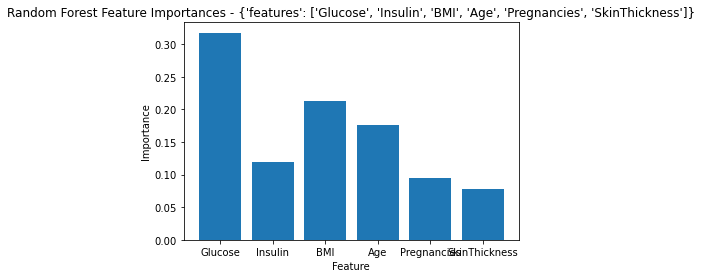

In [270]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


results_df2 = pd.DataFrame(columns=['Configuration', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df_rf = pd.DataFrame(columns=['Configuration', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


for config in configurations:
    X = data2[config['features']]
    y = data2['Outcome']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train+0.001)
    X_test_scaled = scaler.transform(X_test+0.001)

    # Block 1: Cross-Validation with Logistic Regression
    k_fold = KFold(n_splits=30, shuffle=True, random_state=42)
    model2 = LogisticRegression(max_iter=1000)
    scores = cross_val_score(model2, X_train_scaled, y_train, cv=k_fold, scoring='f1')

    print("\nConfiguration:", config)
    print("Logistic Regression Metrics:")
    print("Cross-Validation F1 Scores:", [round(sc,2) for sc in scores[:len(scores)//2]])
    print("Highest F1 Score:", round(scores.max(),2))
    print("Mean F1 Score:", round(np.mean(scores),2))
    # model2.fit(X_train, y_train)

    model2.fit(X_train_scaled, y_train)
    y_pred = model2.predict(X_test_scaled)

    # Store results in DataFrame
    accuracy = round(accuracy_score(y_test, y_pred),2)
    precision = round(precision_score(y_test, y_pred, zero_division=1),2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred),2)

    print("Score on Test Set:", round(model2.score(X_test_scaled, y_test), 2))
    print("Model params: ", model2.intercept_, model2.coef_)

    results_df2 = results_df2.append({
        'Configuration': str(config['features']),
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

    # Block 2: Random Forest Classifier
    model3 = RandomForestClassifier(n_estimators=20, random_state=42)
    model3.fit(X_train_scaled, y_train)

    rf_pred = model3.predict(X_test_scaled)

    accuracy_rf = round(accuracy_score(y_test, rf_pred),2)
    precision_rf = round(precision_score(y_test, rf_pred),2)
    recall_rf = round(recall_score(y_test, rf_pred),2)
    f1_rf = round(f1_score(y_test, rf_pred),2)

    print("\nRandom Forest Metrics:")
    print("Accuracy:", accuracy_rf)
    print("Precision:", precision_rf)
    print("Recall:", recall_rf)
    print("F1 Score:", f1_rf)
    print("Feature importances:", model3.feature_importances_)

    results_df_rf = results_df_rf.append({
        'Configuration': str(config['features']),
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1 Score': f1_rf
    }, ignore_index=True)

    # Plot feature importances
    plt.figure()
    plt.bar(range(len(config['features'])), model3.feature_importances_, tick_label=config['features'])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Random Forest Feature Importances - ' + str(config))
    plt.show()


In [271]:
results_df2

,Configuration,Accuracy,Precision,Recall,F1 Score
0,"['Glucose_t', 'Insulin_t', 'Feature1']",0.77,0.64,0.55,0.59
1,"['Age', 'BMI', 'Feature2']",0.78,0.68,0.47,0.56
2,"['Pregnancies', 'BMI_t', 'Feature2']",0.77,0.68,0.42,0.52
3,"['SkinThickness_t', 'BMI_t', 'Feature2']",0.77,0.68,0.41,0.51
4,"['Glucose_t', 'Insulin_t', 'BMI_t', 'Age', 'Pr...",0.80,0.67,0.61,0.64
5,"['Glucose', 'Insulin', 'BMI', 'Age', 'Pregnanc...",0.78,0.65,0.56,0.61


In [272]:
results_df_rf

,Configuration,Accuracy,Precision,Recall,F1 Score
0,"['Glucose_t', 'Insulin_t', 'Feature1']",0.77,0.62,0.61,0.61
1,"['Age', 'BMI', 'Feature2']",0.77,0.61,0.66,0.63
2,"['Pregnancies', 'BMI_t', 'Feature2']",0.72,0.52,0.52,0.52
3,"['SkinThickness_t', 'BMI_t', 'Feature2']",0.72,0.53,0.56,0.55
4,"['Glucose_t', 'Insulin_t', 'BMI_t', 'Age', 'Pr...",0.72,0.53,0.53,0.53
5,"['Glucose', 'Insulin', 'BMI', 'Age', 'Pregnanc...",0.78,0.64,0.59,0.62
